In [23]:
# Source Blog: https://towardsdatascience.com/analysis-of-car-accidents-in-barcelona-using-pandas-matplotlib-and-folium-73384240106b

import pandas as pd
import numpy as np

df = pd.read_csv('accidents_2017.csv')
df.head()
df.shape


(10339, 15)

In [24]:
# remove 'Unknown' values
df.replace('Unknown', np.nan, inplace=True)
df.isnull().sum().any()
df.head(2)


,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,NaN,NaN,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,NaN,NaN,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426


In [25]:
df.drop(['District Name','Neighborhood Name','Part of the day'],axis=1 ,inplace=True)
df.head(2)

,Id,Street,Weekday,Month,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Número 27 ...,Friday,October,13,8,2,0,2,2,2.125624,41.340045
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,2,0,2,2,2.120452,41.339426


In [26]:
#change column case and underscore in column name instead of space
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)
df.columns

Index(['id', 'street', 'weekday', 'month', 'day', 'hour', 'mild_injuries',
       'serious_injuries', 'victims', 'vehicles_involved', 'longitude',
       'latitude'],
      dtype='object')

In [27]:
# add year column
df['year'] = np.repeat('2017', df.shape[0])
df.head(2)

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,October,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,2,0,2,2,2.120452,41.339426,2017


In [28]:
# change month to int
list(df.month.unique())
month_to_int = {'January': 1, 'February': 2, 'March': 3, 'April': 4,'May': 5, 'June': 6, 'July': 7, 'August': 8,  'October':10, 'September':9, 'December':12, 'November':11}
df['month'].replace(month_to_int, inplace=True)
df.head(2)

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017


In [29]:
df['date'] = pd.to_datetime(df[['year','month', 'day', 'hour']])
df.head(2)

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year,date
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017,2017-10-13 08:00:00
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017,2017-09-01 13:00:00


In [30]:
# Extract the year
df['date'].dt.year

# Extract the month
df['date'].dt.month

# Extract the day
df['date'].dt.day

# Extract the hour
df['date'].dt.hour

# Extract the day of the week
df['date'].dt.dayofweek

# Day of the week - first five elements of the returned serie.
df['date'].dt.dayofweek.head(2)

0    4
1    4
Name: date, dtype: int64

In [31]:
df.drop(['month', 'day','hour', 'year', 'weekday','street'], inplace=True, axis=1)
df.head(2)

,id,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
0,2017S008429,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00


In [32]:
# We remove the spaces in the entries of id 
df.id = df.id.apply(lambda x:x.strip())
df.id.loc[0]
# We remove the spaces in the entries of id 
df.set_index('id', inplace=True)
df.loc['2017S008429']

mild_injuries                          2
serious_injuries                       0
victims                                2
vehicles_involved                      2
longitude                        2.12562
latitude                           41.34
date                 2017-10-13 08:00:00
Name: 2017S008429, dtype: object

In [33]:
# Assess whether or not the dataframe contains duplicated rows.
df.duplicated().sum()
# 9

# Print duplicated rows.
df[df.duplicated()]


,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
id,,,,,,,
2017S006811,1,0,1,2,2.147915,41.393601,2017-08-07 10:00:00
2017S003575,1,0,1,2,2.194670,41.412827,2017-04-21 10:00:00
2017S003286,1,0,1,1,2.136744,41.357598,2017-04-10 13:00:00
2017S008856,1,0,1,1,2.203962,41.407568,2017-10-26 08:00:00
2017S003750,1,0,1,1,2.168836,41.386306,2017-04-27 16:00:00
2017S001504,1,0,1,2,2.139400,41.418656,2017-02-23 14:00:00
2017S004447,1,0,1,1,2.209813,41.402218,2017-05-19 20:00:00
2017S005606,1,0,1,3,2.189016,41.383396,2017-06-27 17:00:00
2017S003201,1,0,1,1,2.168349,41.430413,2017-04-06 19:00:00


In [34]:
# Drop duplicates.
df.drop_duplicates(inplace=True)
df.shape

(10330, 7)

In [35]:
print('Total number of accidents in 2017 :{}'.format(df.shape[0]))
# get Distribution of car accidents per month
import calendar
accidents_month = df.groupby(df['date'].dt.month).count().date

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]


Total number of accidents in 2017 :10330


Text(0, 0.5, 'Number of accidents')

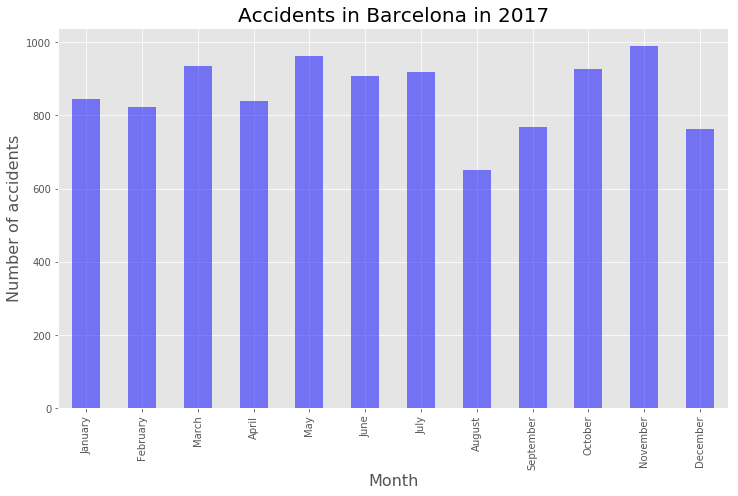

In [36]:
# show on graph
import matplotlib.pyplot as plt
# % matplotlib inline
plt.style.use('ggplot')

accidents_month.plot(kind='bar', color='blue', figsize=(12,7), alpha=0.5)
# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16)

In [37]:
# Distribution of car accidents per day of the week

# Number of accident per day of the week
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date

# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

accidents_day

Monday       1508
Tuesday      1690
Wednesday    1650
Thursday     1673
Friday       1759
Saturday     1155
Sunday        895
Name: date, dtype: int64

Text(0, 0.5, 'Number of accidents')

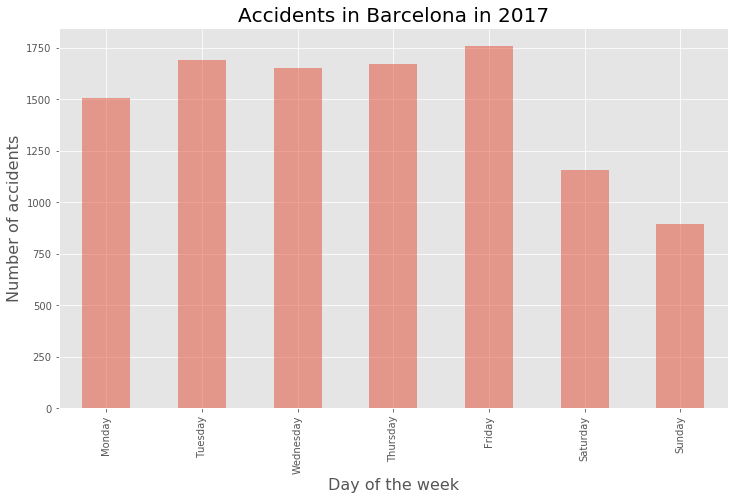

In [38]:
# visualize
accidents_day.plot(kind='bar', figsize=(12,7), alpha=0.5)
# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16)

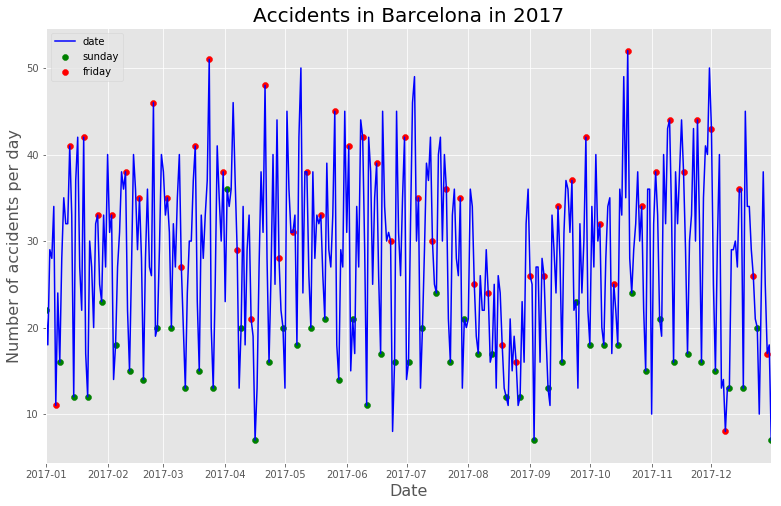

In [39]:
# Date wise accidents
accidents = df.groupby(df['date'].dt.date).count().date
accidents.plot(figsize=(13,8), color='blue')

# sunday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='sunday')

# friday accidents
fridays = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(fridays.index, fridays, color='red', label='friday')

# Title, x label and y label
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
plt.legend()

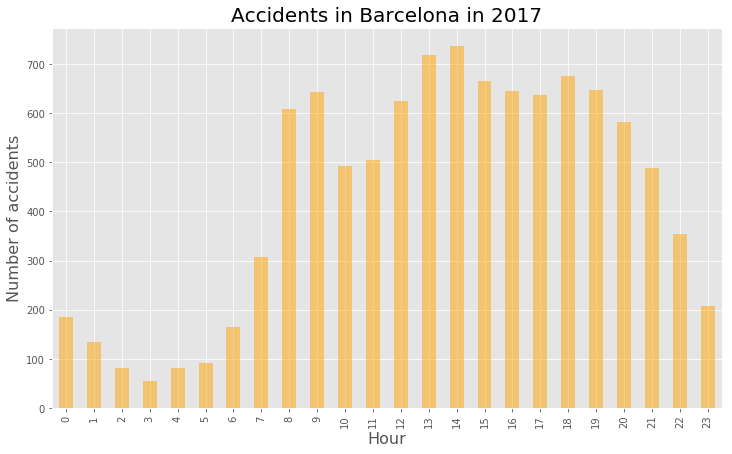

In [40]:
# Distribution of car accidents per hour
accidents_hour = df.groupby(df['date'].dt.hour).count().date

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

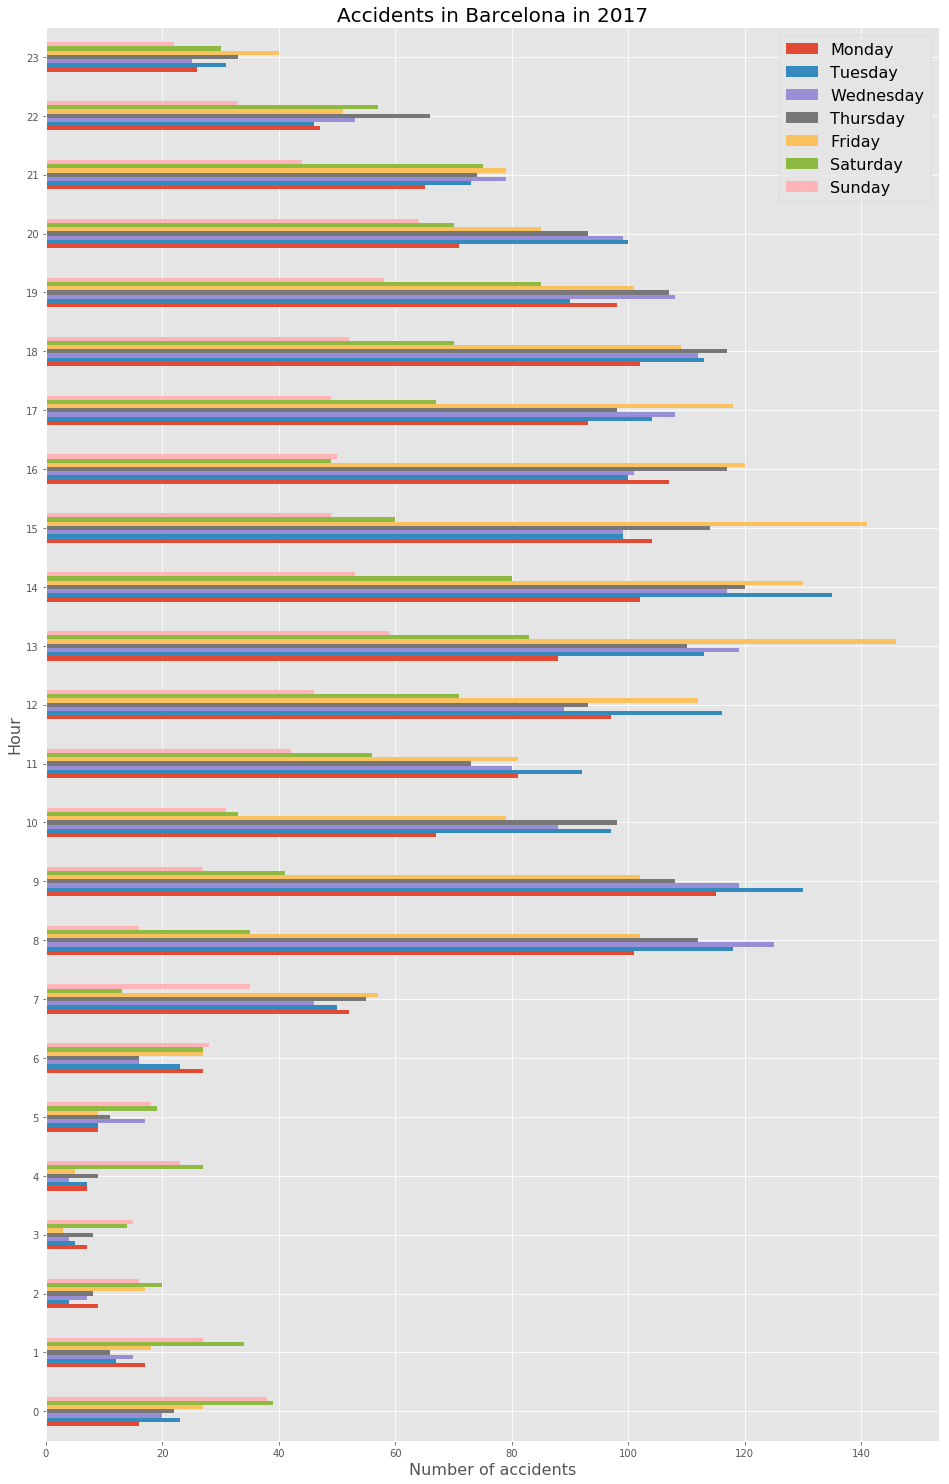

In [41]:
# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);


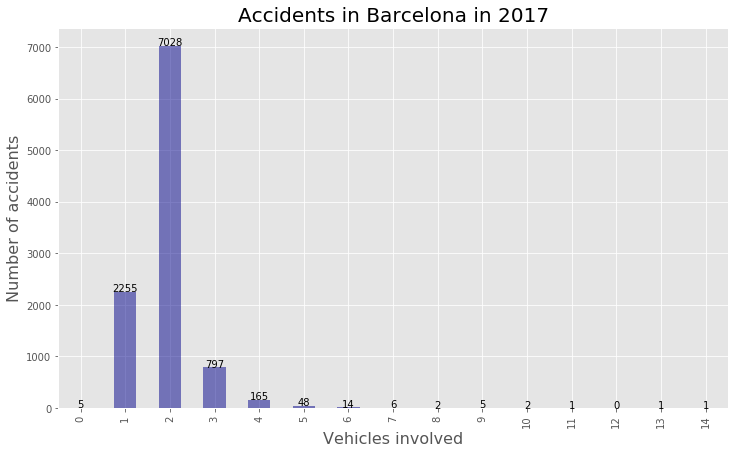

In [42]:
# Compute the number of accidents according to the number of vehicles involved
vehicles_involved = df.vehicles_involved.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our Serie for better visualization
vehicles_involved[12]=0

vehicles_involved.sort_index(inplace=True)

# Plot number of car accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar',figsize=(12,7), color='darkblue', alpha=0.5)

# Title and x,y labels
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Vehicles involved',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Print a label above each bar indicating the number of accidents
for index in vehicles_involved.index:
    plt.text(x=index,y=vehicles_involved.loc[index],s=str(vehicles_involved.loc[index]),horizontalalignment='center')


Text(0, 0.5, '')

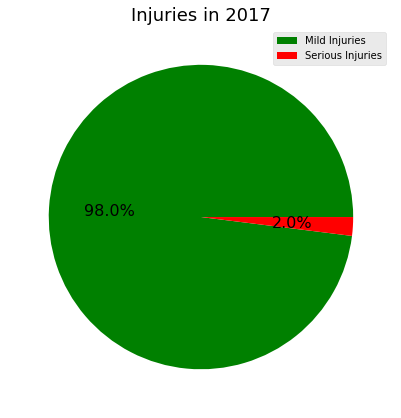

In [48]:
# Mild — Serious injuries
injuries = df[['mild_injuries', 'serious_injuries']].sum()
injuries.plot(kind='pie', figsize=(7,7), colors=['green', 'red'], labels=None, autopct='%1.1f%%', fontsize=16)

# legend and title
plt.legend(labels=['Mild Injuries', 'Serious Injuries'])
plt.title('Injuries in 2017', fontsize=18)
plt.ylabel('')

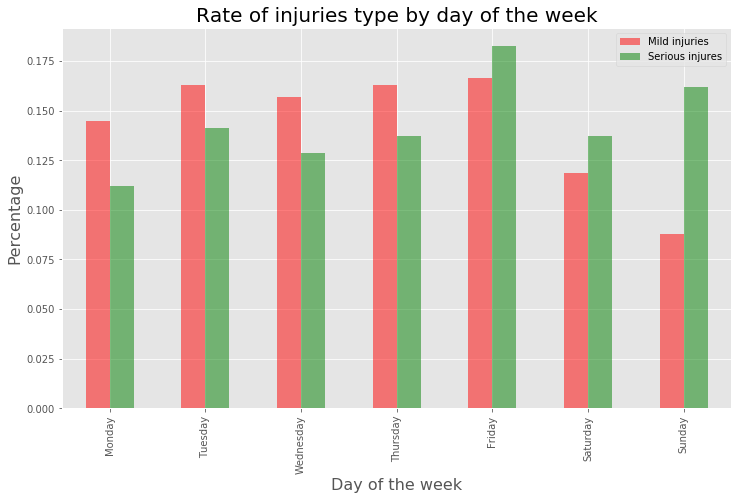

In [49]:
# Number of serious injuries per day of the week
accidents_serious = df[df['serious_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().serious_injuries
# Percentage of serious injuries per day of the week
rate_serious = accidents_serious/accidents_serious.sum()

# Number of mild injuries per day of the week
accidents_mild = df[df['mild_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().mild_injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Serious injures':rate_serious,'Mild injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);

In [51]:
# Location analysis

import folium
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)
barcelona_map

In [60]:
# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# adf = df.head(5000)
# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label != '0':
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darked',
            fill_opacity=0.6
        ).add_to(barcelona_map)

barcelona_map


In [61]:
from folium import plugins

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(barcelona_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
barcelona_map


In [62]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(df.latitude,df.longitude,df.date.dt.hour):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(barcelona_map)

barcelona_map